In [17]:
import sys
import numpy as np
import sys
print(sys.version)

from openLoop.utilities.ipynb.displays import *
from openLoop.utilities.ipynb.filters import *
from openLoop.utilities.ipynb.hdf import *
#from YALL.utilities.tabulate import tabulate

from declarative import (
  OverridableObject, mproperty
)

import sympy
from openLoop.utilities.ipynb.displays import *
from openLoop.utilities.ipynb.ipy_sympy import *
import scipy.linalg

3.5.2 (default, Sep 14 2016, 11:28:32) 
[GCC 6.2.1 20160901 (Red Hat 6.2.1-1)]


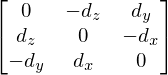

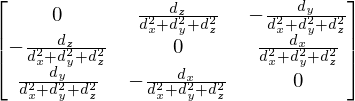

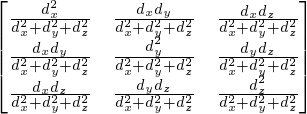

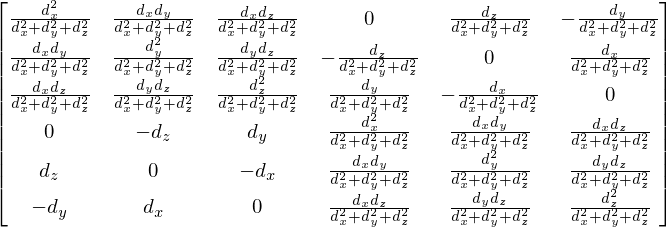

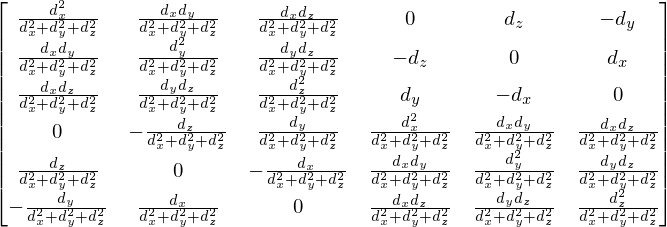

In [18]:
dx,dy,dz = sympy.var('d_x, d_y, d_z')
d = sympy.Matrix([dx,dy,dz])
dLsq = dx**2 + dy**2 + dz**2
dLsq = (d.T * d)[0,0]
display(dLsq)
P_torque = sympy.Matrix([[0,-dz,dy],[dz,0,-dx],[-dy,dx,0]])
display(P_torque)
P_force = sympy.Matrix([[0,dz,-dy],[-dz,0,dx],[dy,-dx,0]]) / dLsq
display(P_force)
P_d = (d * d.T)/dLsq
display(P_d)

bm = sympy.Matrix(np.bmat([[P_d, P_force],[P_torque,P_d]]))
display(bm)
display(bm.T)

In [19]:
bm.det()

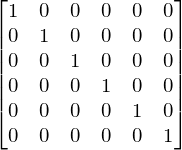

In [20]:
ct = (bm * bm)
ct.simplify()
ct

In [21]:
d_np = np.array([dx,dy,dz])
d_np
np.outer(d_np, d_np)

array([[d_x**2, d_x*d_y, d_x*d_z],
       [d_x*d_y, d_y**2, d_y*d_z],
       [d_x*d_z, d_y*d_z, d_z**2]], dtype=object)

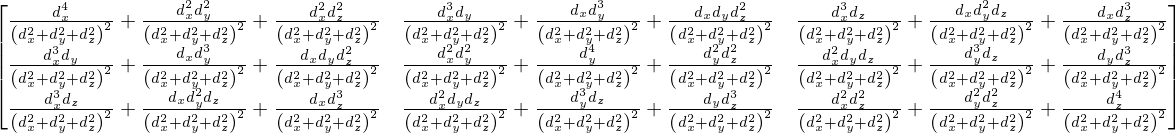

In [22]:
ct = (P_d * P_d.T)
ct.expand().simplify()
ct

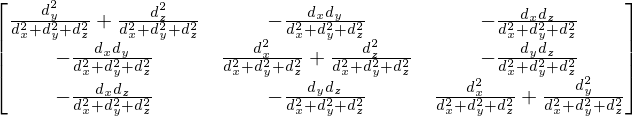

In [23]:
ct = (P_force * P_torque)
ct.expand().simplify()
ct


In [24]:
I = np.eye(3)
VIAB = np.bmat([[I,I],[I,-I]])
d = 5
X2VI = np.matrix([
    [0,0,0,1,1/d,1],
    [0,d,-1,0,0,0,],
    [1,0,-1,0,0,0],
]) * VIAB.T
print(np.linalg.inv(X2VI[:,0:3]) * X2VI[:,3:6])
print(np.linalg.inv(X2VI[:,3:6]) * X2VI[:,0:3])
np.linalg.eig(np.linalg.inv(X2VI[:,0:3]) * X2VI[:,3:6])

[[ 0.01960784 -0.19607843 -0.98039216]
 [-0.19607843  0.96078431 -0.19607843]
 [-0.98039216 -0.19607843  0.01960784]]
[[ 0.01960784 -0.19607843 -0.98039216]
 [-0.19607843  0.96078431 -0.19607843]
 [-0.98039216 -0.19607843  0.01960784]]


(array([ 1., -1.,  1.]), matrix([[ 0.71400555, -0.70014004,  0.51870247],
         [-0.13730876, -0.14002801, -0.77360539],
         [-0.6865438 , -0.70014004, -0.36398139]]))

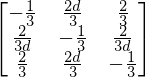

In [25]:
I = np.eye(3, dtype = object)
VIAB = np.bmat([[I,I],[-I,I]])
d = sympy.var('d')
X2VI = sympy.Matrix(np.matrix([
    [0,0,0,1,d,1],
    [0,d,-1,0,0,0,],
    [1,0,-1,0,0,0],
]) * VIAB.T)
M = sympy.Matrix(X2VI[:,0:3]).inv() * sympy.Matrix(X2VI[:,3:6])
M = M.expand()
M.simplify()
M

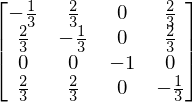

(array([-1.,  1., -1., -1.]),
 array([[-0.81649658,  0.57735027,  0.13613844,  0.        ],
        [ 0.40824829,  0.57735027, -0.76527776,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ],
        [ 0.40824829,  0.57735027,  0.62913932,  0.        ]]))

In [26]:
I = np.eye(4, dtype = object)
VIAB = np.bmat([[I,I],[-I,I]])
d = sympy.var('d')
X2VI = sympy.Matrix(np.matrix([
    [0,0,0,0,1,1,0,1],
    [1,0,d,-1,0,0,0,0,],
    [0,1,-d,-1,0,0,0,0],
    [1,-1,0,0,0,0,0,0],
])) * sympy.Matrix(VIAB).inv()
M = sympy.Matrix(X2VI[:,0:4]).pinv() * sympy.Matrix(X2VI[:,4:8])
M = M.expand()
M.simplify()
display(M)
np.linalg.eig(np.array(M.n()).astype(float))

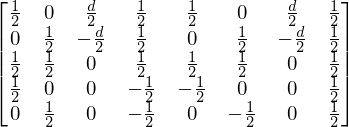

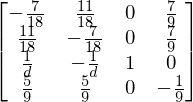

In [27]:
I = np.eye(4, dtype = object)
VIAB = np.bmat([[I,I],[-I,I]])
d = sympy.var('d')
X2VI = sympy.Matrix(np.matrix([
    [0,0,0,0,1,0,d,1],
    [0,0,0,0,0,1,-d,1],
    [0,0,0,0,1,1,0,1],
    [1,0,0,-1 ,0,0,0,0],
    [0,1,0,-1,0,0,0,0],
])) * sympy.Matrix(VIAB).inv()
display(X2VI)
M = sympy.Matrix(X2VI[:,0:4]).pinv() * sympy.Matrix(X2VI[:,4:8])
M = M.expand()
M.simplify()
display(M)
#np.linalg.eig(np.array(M.n()).astype(float))

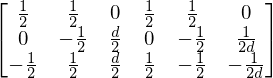

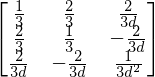

In [124]:
d = sympy.var('d')
IV = np.eye(3, dtype = object)
IV[2,2] = 1/d
IC = np.eye(3, dtype = object)
IC[2,2] = d
VIAB = np.bmat([[IV,IV],[-IC,IC]])
d = sympy.var('d')
X2VI = sympy.Matrix([
    [0, 0,0,  1, 1,0],
    [0, 0,0,  0,-1,1],
    [-1,1,1,  0, 0,0],
]) * sympy.Matrix(VIAB).inv()
display(X2VI)
M = sympy.Matrix(X2VI[:,0:3]).pinv() * sympy.Matrix(X2VI[:,3:6])
M = M.expand()
M.simplify()
display(M)
if isinstance(d, (float,int)):
    print(np.linalg.eig(np.array(M.n()).astype(float)))

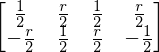

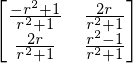

In [71]:
#For a simple machine
r = sympy.var('r')
#r = 100
IV = np.eye(2, dtype = object)
IC = np.eye(2, dtype = object)
VIAB = np.bmat([[IV,IV],[-IC,IC]])
X2VI = sympy.Matrix([
    [0, 0, 1, r*1],
    [-r,1, 0, 0],
]) * sympy.Matrix(VIAB).inv()
display(X2VI)
M = sympy.Matrix(X2VI[:,0:2]).pinv() * sympy.Matrix(X2VI[:,2:4])
M = M.expand()
M.simplify()
display(M)
if isinstance(r, (float,int)):
    print(np.linalg.eig(np.array(M.n()).astype(float)))

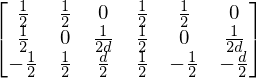

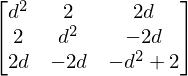

In [164]:
#Based on the simple machine APPEARS TO BE GOOD
d = sympy.var('d')
IV = np.eye(3, dtype = object)
#IV[2,2] = 1/d
IC = np.eye(3, dtype = object)
#IC[2,2] = 1/d
VIAB = np.bmat([[IV,IV],[-IC,IC]])
#d = -1
X2VI = sympy.Matrix([
    [0,  0,0,   1, 1, 0],
    [0,  0,0,   1, 0, 1/d],
    [-1, 1,d,   0,0 , 0],
]) * sympy.Matrix(VIAB).inv()
display(X2VI)
M = sympy.Matrix(X2VI[:,0:3]).inv() * sympy.Matrix(X2VI[:,3:6])
M = M.expand()
den = d**2 + 2
M = den * M
M.simplify()
display(M)
if isinstance(d, (float,int)):
    print(np.linalg.eig(np.array((M/den).n()).astype(float)))

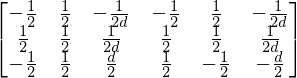

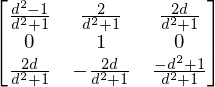

In [166]:
#Based on the simple machine
d = sympy.var('d')
IV = np.eye(3, dtype = object)
#IV[2,2] = 1/d
IC = np.eye(3, dtype = object)
#IC[2,2] = 1/d
VIAB = np.bmat([[IV,IV],[-IC,IC]])
#d = -1
X2VI = sympy.Matrix([
    [0,  0,0,   -1, 1,-1/d],
    [0,  0,0,   1, 1,  1/d],
    [-1, 1,d,   0, 0,  0],
]) * sympy.Matrix(VIAB).inv()
display(X2VI)
M = sympy.Matrix(X2VI[:,0:3]).inv() * sympy.Matrix(X2VI[:,3:6])
M = M.expand()
den = 1# d**2 + 2
M = den * M
M.simplify()
display(M)
if isinstance(d, (float,int)):
    print(np.linalg.eig(np.array((M/den).n()).astype(float)))

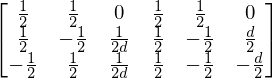

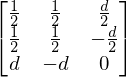

In [54]:
#NOT THIS ONE
d = sympy.var('d')
IV = np.eye(3, dtype = object)
IV[2,2] = d
IC = np.eye(3, dtype = object)
IC[2,2] = 1/d
VIAB = np.bmat([[IV,IV],[-IC,IC]])
X2VI = sympy.Matrix([
    [0, 0,0,  1, 1, 0],
    [0, 0,0,  1, -1,1],
    [-1,1,1,  0, 0,0],
]) * sympy.Matrix(VIAB).inv()
display(X2VI)
M = sympy.Matrix(X2VI[:,0:3]).pinv() * sympy.Matrix(X2VI[:,3:6])
M = M.expand()
M.simplify()
display(M)
if isinstance(d, (float,int)):
    print(np.linalg.eig(np.array(M.n()).astype(float)))

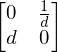

In [29]:
I = np.eye(2, dtype = object)
VIAB = np.bmat([[-I,-I],[I,-I]])
d = sympy.var('d')
X2VI = sympy.Matrix(np.matrix([
    [0,0,d,1],
    [-d,1,0,0,],
])) * sympy.Matrix(VIAB).inv()
M = sympy.Matrix(X2VI[:,2:4]).inv() * sympy.Matrix(X2VI[:,0:2])
M = M.expand()
M.simplify()
M

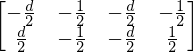

In [30]:
X2VI